# Week 6

## Jupyter Notebook


In [13]:
# Cell 2 - Load Data
from IPython.display import display, HTML, Latex
import pandas as pd
import statsmodels.formula.api as sm
display(HTML("<h2>Concrete Data set</h2>"))
df = pd.read_excel('Concrete_Data.xls', sheetname='Sheet1')
# partition dataframe into 2 dataframes
y=df.drop(['cement','slag','flyAsh','water','plasticizer','coarse','fine','age'], axis=1)
print(y.describe())
X=df.drop(['strength'], axis=1)
print(X.describe())
# scale X
from sklearn import preprocessing
display(HTML("<h3>Standardization</h3>"))
std_scaler=preprocessing.StandardScaler().fit(X.values)
X_scaled=std_scaler.transform(X)
X_scaled_df=pd.DataFrame(X_scaled,index=X.index,columns=X.columns)
X_scaled_df.describe()

          strength
count  1030.000000
mean     35.817836
std      16.705679
min       2.331808
25%      23.707115
50%      34.442774
75%      46.136287
max      82.599225
            cement         slag       flyAsh        water  plasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485    54.187136   181.566359     6.203112   
std     104.507142    86.279104    63.996469    21.355567     5.973492   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   142.950000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

            coarse         fine          age  
count  1030.000000  1030.000000  1030.000000  
mean    972.918592   773.578883    45.662136  
std      77.753818   

C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,cement,slag,flyAsh,water,plasticizer,coarse,fine,age
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,4.335798e-17,-1.117607e-15,1.267056e-15,5.503688e-16,3.987102e-16,-9.011131e-17,-4.575358e-16,1.534910e-16
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-8.568863e-01,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01
25%,-8.500258e-01,-8.568863e-01,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01
50%,-7.912996e-02,-6.017760e-01,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01
75%,6.589771e-01,8.007508e-01,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01
max,2.477918e+00,3.310688e+00,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00


[2.28210403 1.41758764 1.3415455  1.01513995 0.95252658 0.79089808
 0.17790128 0.03007148]


[0.28498605 0.17702642 0.16753038 0.1267693  0.11895022 0.09876628
 0.02221607 0.00375529]


[0.28498605 0.46201247 0.62954284 0.75631214 0.87526237 0.97402864
 0.99624471 1.        ]


<IPython.core.display.Javascript object>


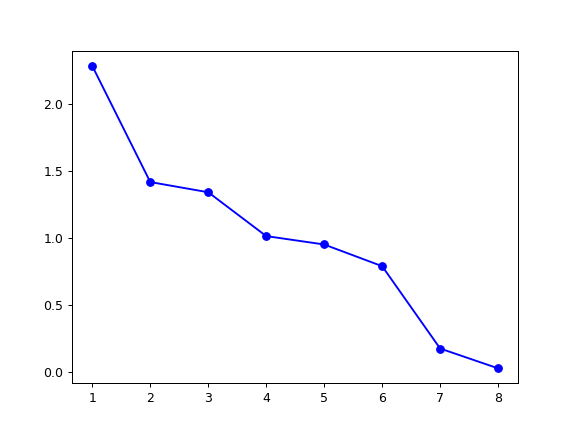

In [14]:
# Cell 3 - PCA Initial Analysis
import numpy as np
display(HTML("<h1>PCA</h1>"))
from sklearn import decomposition
#set up and execute PCA
pca=decomposition.PCA(n_components=8)
pca.fit(X_scaled_df)
#display eigen values
display(HTML("<h2>Eigenvalues (sorted)</h2>"))
print(pca.explained_variance_)
#display explained variance ratio
display(HTML("<h2> Percent variability explained by each component"))
print(pca.explained_variance_ratio_)
#display cumulative sum of variability explained
display(HTML("<h2> Cumulative Percent variability explained by each component"))
print(np.cumsum(pca.explained_variance_ratio_))
#
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(np.arange(1,9,1),pca.explained_variance_,'-bo')
plt.show()

In [15]:
# Cell 4 - Reduced PCA analysis
pcaReduced=decomposition.PCA(n_components=5)
pcaReduced.fit(X_scaled_df)
#print(pcaReduced.components_)
X_pca=pcaReduced.transform(X_scaled_df)
X_pca_df=pd.DataFrame(X_pca,index=X.index,columns=['pca1','pca2','pca3','pca4','pca5'])
modeling_df=pd.concat([y,X_pca_df],axis=1,join='inner')
#print(modeling_df.describe())
model1 = sm.ols(formula='strength~pca1+pca2+pca3+pca4+pca5',data=modeling_df)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     161.4
Date:                Thu, 20 Feb 2020   Prob (F-statistic):          1.50e-126
Time:                        08:50:16   Log-Likelihood:                -4061.9
No. Observations:                1030   AIC:                             8136.
Df Residuals:                    1024   BIC:                             8165.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.8178      0.390     91.791      0.0

In [16]:
# Cell 5 - calculate VIF and save in data frame
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["VIF Factor"]=[variance_inflation_factor(X_pca_df.values,i) for i in range(X_pca_df.shape[1])]
vif1["Variable"]=X_pca_df.columns
vif1=vif1[["Variable","VIF Factor"]]
vif1

,Variable,VIF Factor
0,pca1,1.0
1,pca2,1.0
2,pca3,1.0
3,pca4,1.0
4,pca5,1.0


C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                        model  p  Mallows Cp
0                        (0,)  1 -369.953710
1                        (1,)  1 -979.735607
2                        (2,)  1 -998.305377
3                        (3,)  1 -805.296471
4                        (4,)  1 -672.127462
5                        (5,)  1 -955.776686
6                        (6,)  1 -953.729486
7                        (7,)  1 -740.818469
8                      (0, 1)  2 -155.693120
9                      (0, 2)  2 -341.192475
10                     (0, 3)  2 -202.205114
11                     (0, 4)  2  -93.846800
12                     (0, 5)  2 -335.149066
13                     (0, 6)  2 -359.075909
14                     (0, 7)  2 -146.111126
15                     (1, 2)  2 -966.288435
16                     (1, 3)  2 -729.371917
17                     (1, 4)  2 -632.492100
18                     (1, 5)  2 -931.418805
19                     (1, 6)  2 -929.534850
20                     (1, 7)  2 -679.457427
21        

C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


<IPython.core.display.Javascript object>


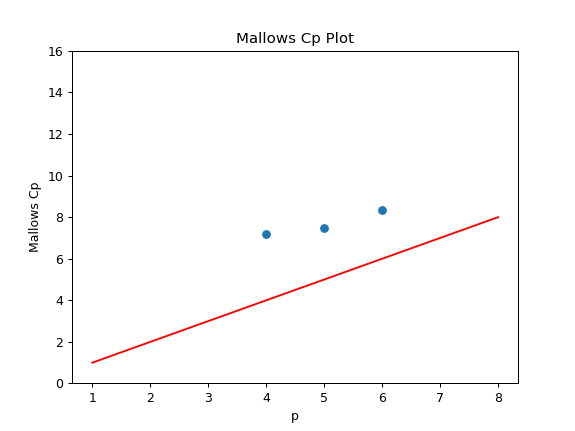

In [17]:
# Cell 6 - Mallow's CP
# 
# Reload data
from IPython.display import display, HTML, Latex
import pandas as pd
import statsmodels.formula.api as sm
df = pd.read_excel('Concrete_Data.xls', sheet_name='Sheet1')
#
# Mallow's CP
#
display(HTML("<h2>Mallows CP"))
#this code is based upon the Best Subsets example from Week 6
import numpy as np
import pandas as pd
from itertools import chain, combinations
import statsmodels.formula.api as sm
import statsmodels.tools.tools as smt
import matplotlib.pyplot as plt
# xrange is a Python 2 construct not defined in Python 3
def xrange(x):
    return iter(range(x))
def mallowsCp(X, y):
    n_features = X.shape[1]
    subsets = chain.from_iterable(combinations(xrange(n_features), k+1) for k in xrange(n_features))
    #find full model and perform regression
    for subset in subsets:
        foo=np.array(subset)
        if foo.size == n_features:
            tmpX=smt.add_constant(X.iloc[:,foo])
            lin_reg_full=sm.OLS(y,tmpX).fit()
            N=X.shape[0]
            mse_full=lin_reg_full.mse_resid
    # create arrays to hold results
    modelArray=[]
    cpArray=[]
    pArray=[]
    #process all models and store results
    subsets = chain.from_iterable(combinations(xrange(n_features), k+1) for k in xrange(n_features))
    for subset in subsets:
        subsetArray=np.array(subset)
        p=subsetArray.size
        tmpX=smt.add_constant(X.iloc[:,subsetArray])
        lin_reg = sm.OLS(y,tmpX).fit()
        p=subsetArray.size
        Cp=(lin_reg.ess/mse_full)-N+2.0*p
        modelArray.append(subset)
        cpArray.append(Cp)
        pArray.append(p)
        score = lin_reg.rsquared_adj
    cp_df=pd.DataFrame.from_items([('model',modelArray),('p',pArray),('Mallows Cp',cpArray)])
    return cp_df
X=df.drop('strength',axis=1)
y=df["strength"]
#print(X.head(5))
mallowscp_df=mallowsCp(X,y)
#
print(mallowscp_df)
#
#Cp Plot
plt.figure()
plt.plot(mallowscp_df["p"],mallowscp_df["Mallows Cp"],'o')
plt.plot((1,X.shape[1]),(1,X.shape[1]),'r')
plt.ylim(0,2*X.shape[1])
plt.xlabel('p')
plt.ylabel('Mallows Cp')
plt.title('Mallows Cp Plot')
plt.show()

In [21]:
# cell 7
#
display(HTML("<h2>Multiple Regression Diagnostics"))
#this code extends the Mallows CP example
import numpy as np
import pandas as pd
from itertools import chain, combinations
import statsmodels.formula.api as sm
import statsmodels.tools.tools as smt
import matplotlib.pyplot as plt
# xrange is a Python 2 construct not defined in Python 3
def xrange(x):
    return iter(range(x))
def regressionDiagnostics(X, y):
    n_features = X.shape[1]
    subsets = chain.from_iterable(combinations(xrange(n_features), k+1) for k in xrange(n_features))
    #find full model and perform regression
    for subset in subsets:
        foo=np.array(subset)
        if foo.size == n_features:
            tmpX=smt.add_constant(X.iloc[:,foo])
            lin_reg_full=sm.OLS(y,tmpX).fit()
            N=X.shape[0]
            mse_full=lin_reg_full.mse_resid
    # create arrays to hold results
    modelArray=[]
    cpArray=[]
    pArray=[]
    rSquaredAdj=[]
    mse_res=[]
    aicArray=[]
    bicArray=[]
    #process all models and store results
    subsets = chain.from_iterable(combinations(xrange(n_features), k+1) for k in xrange(n_features))
    for subset in subsets:
        subsetArray=np.array(subset)
        p=subsetArray.size
        tmpX=smt.add_constant(X.iloc[:,subsetArray])
        lin_reg = sm.OLS(y,tmpX).fit()
        p=subsetArray.size
        Cp=(lin_reg.ess/mse_full)-N+2.0*p
        modelArray.append(subset)
        cpArray.append(Cp)
        pArray.append(p)
        rSquaredAdj.append(lin_reg.rsquared_adj)
        mse_res.append(lin_reg.mse_resid)
        aicArray.append(lin_reg.aic)
        bicArray.append(lin_reg.bic)
    cp_df=pd.DataFrame.from_items([('model',modelArray),('p',pArray),('Mallows Cp',cpArray),('R-Squared_Adj',rSquaredAdj),('MSE-residual',mse_res),('AIC',aicArray),('BIC',bicArray)])
    return cp_df
X=df.drop('strength',axis=1)
y=df["strength"]
#print(X.head(5))
allDiagnostics=regressionDiagnostics(X,y)
print(allDiagnostics.head(10))
print(allDiagnostics.tail(10))
#
print(X.columns)
#save to excel file
writer=pd.ExcelWriter('AllDiagnostics2.xlsx','xlsxwriter')
allDiagnostics.to_excel(writer, sheet_name='Sheet1')
writer.save()

C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


    model  p  Mallows Cp  R-Squared_Adj  MSE-residual          AIC  \
0    (0,)  1 -369.953710       0.247106    210.117516  8433.108416   
1    (1,)  1 -979.735607       0.017223    274.273252  8707.560060   
2    (2,)  1 -998.305377       0.010222    276.226995  8714.871098   
3    (3,)  1 -805.296471       0.082985    255.920344  8636.223661   
4    (4,)  1 -672.127462       0.133189    241.909505  8578.232056   
5    (5,)  1 -955.776686       0.026255    271.752511  8698.049954   
6    (6,)  1 -953.729486       0.027027    271.537123  8697.233264   
7    (7,)  1 -740.818469       0.107293    249.136552  8608.552615   
8  (0, 1)  2 -155.693120       0.326471    187.968225  8319.370120   
9  (0, 2)  2 -341.192475       0.256471    207.503793  8421.213107   

           BIC  
0  8442.983044  
1  8717.434688  
2  8724.745726  
3  8646.098289  
4  8588.106684  
5  8707.924582  
6  8707.107892  
7  8618.427243  
8  8334.182062  
9  8436.025049  
                        model  p  Mallows 

C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


<IPython.core.display.Javascript object>


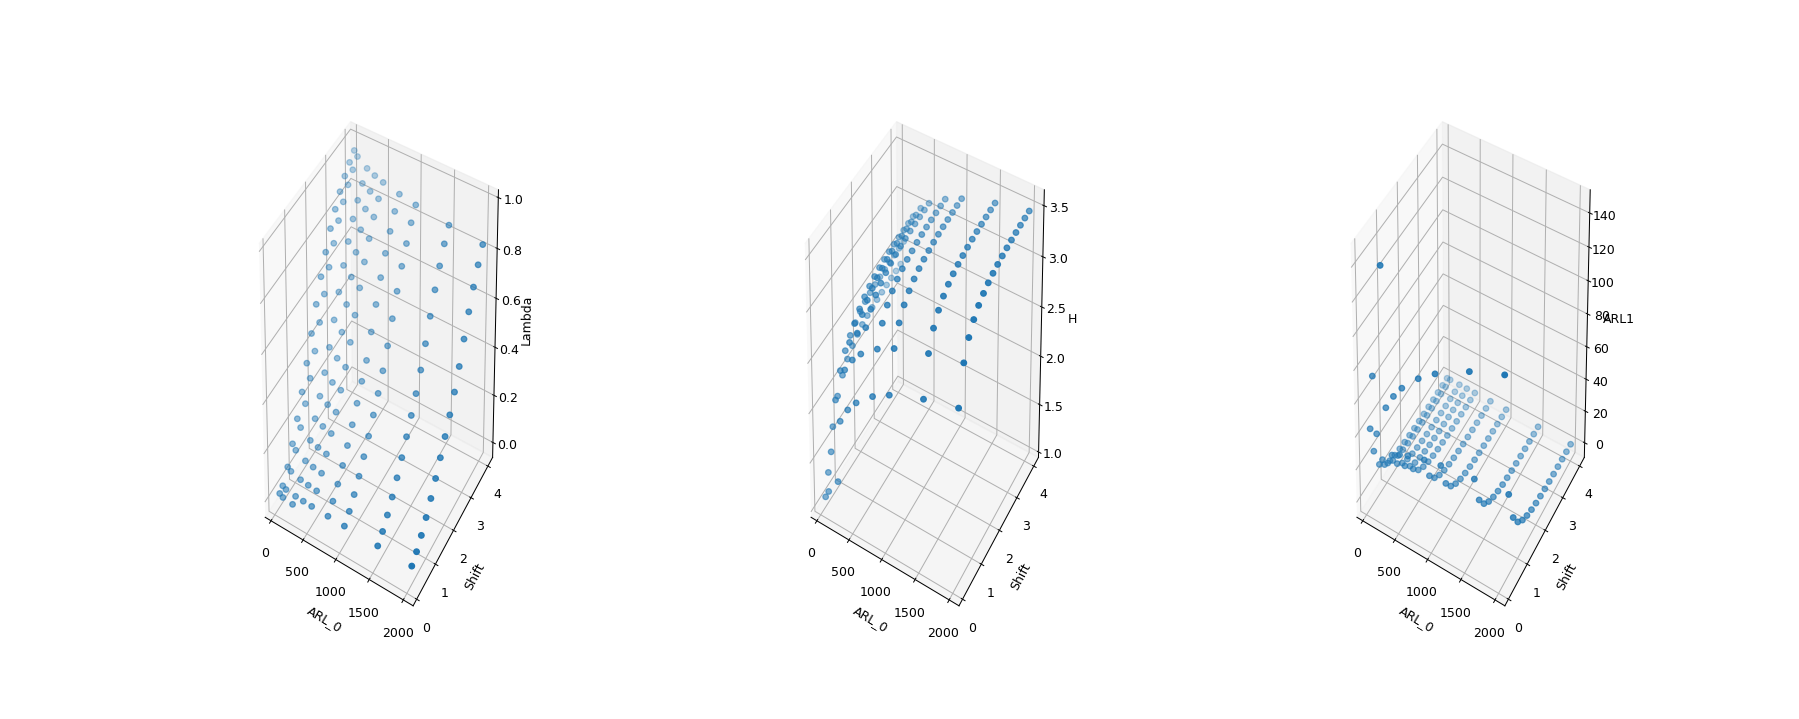

             ARL_0       Shift      Lambda           H        ARL1
count   147.000000  147.000000  147.000000  147.000000  147.000000
mean    712.380952    2.083673    0.431907    2.846567   11.693817
std     629.551192    1.180030    0.300861    0.500289   22.786099
min      50.000000    0.100000    0.005750    1.115437    1.049236
25%     250.000000    1.000000    0.150766    2.563459    1.703638
50%     500.000000    2.000000    0.398042    2.983023    3.178576
75%    1000.000000    3.000000    0.716447    3.208034    8.769937
max    2000.000000    4.000000    0.960498    3.480321  143.109650


In [19]:
# Cell 8 - Load and plot data
#
from IPython.display import display, HTML, Latex
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
display(HTML("<h2>Quality Control Data</h2>"))
qc=pd.read_excel('OptimalEwma.xlsx', sheet_name='Sheet1')
qc.rename(index=str,columns={" ARL_0":"ARL_0"," Shift":"Shift"," Lambda":"Lambda"," H":"H"," ARL1":"ARL1"})
qc=qc.dropna(axis=0,how='any')
qc.describe()
qc.columns

fig=plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
ax=fig.add_subplot(131,projection='3d')
ax.scatter(qc[' ARL_0'],qc[' Shift'],qc[' Lambda'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('Lambda')
#
ax=fig.add_subplot(132,projection='3d')
ax.scatter(qc[' ARL_0'],qc[' Shift'],qc[' H'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('H')
#
ax=fig.add_subplot(133,projection='3d')
ax.scatter(qc[' ARL_0'],qc[' Shift'],qc[' ARL1'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('ARL1')
plt.show()

print(qc.describe())

C:\Users\fwn285\AppData\Local\Continuum\anaconda3\envs\env_iise\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


The neural network trained for 1764 epochs
R^2 value for the training set is 0.791275
R^2 value for the test set is 0.808326
MSE for Lambda (training): 0.04
MSE for H (training): 0.16
MSE for ARL1 (training): 107.62
MSE for Lambda (test): 0.04
MSE for H (test): 0.21
MSE for ARL1 (test): 98.34
Mean absolute error for Lambda (training): 0.18
Mean absolute error for H (training): 0.33
Mean absolute error for ARL1 (training): 4.19
Mean absolute error for Lambda (test): 0.17
Mean absolute error for H (test): 0.36
Mean absolute error for ARL1 (test): 4.94


<IPython.core.display.Javascript object>


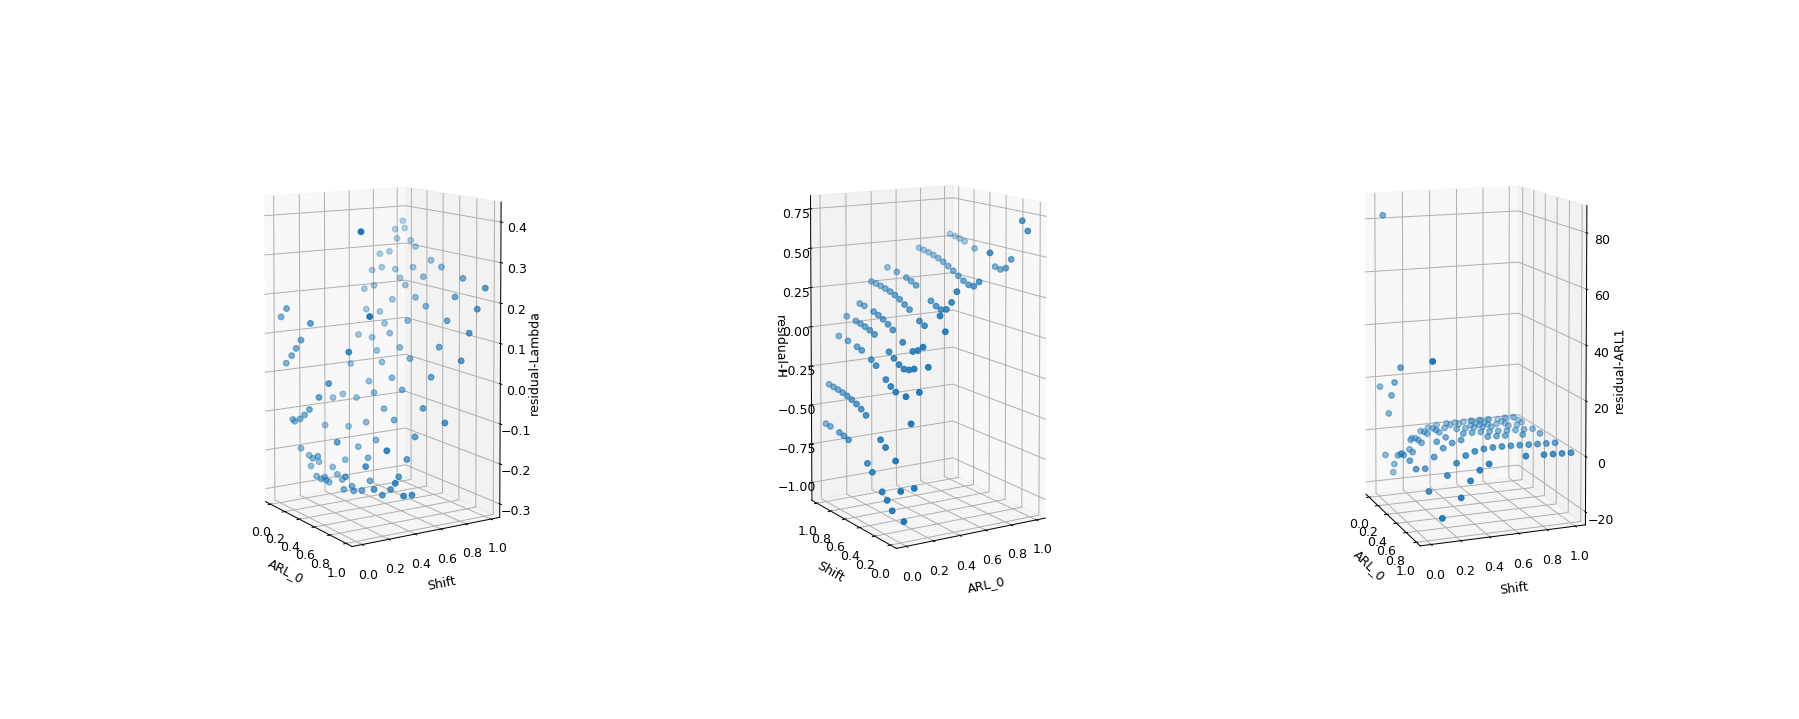

In [20]:
# Cell 9 - Neural network code
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
#build the data arrays and scale
qcX=qc.drop(qc.columns[[2,3,4]],axis=1)
qcY=qc.drop(qc.columns[[0,1]],axis=1)
qc_scaler=MinMaxScaler()
X_scaled=qc_scaler.fit_transform(qcX,qcY)
qcX_train,qcX_test,qcY_train,qcY_test=train_test_split(X_scaled,qcY,test_size=0.25)
#create dataframes for training and testing datasets
foo={'ARL_0':qcX_train[:,0],'Shift':qcX_train[:,1]}
nn1_train_df=pd.DataFrame(data=foo)
nn1_train_df['Lambda']=qcY_train.values[:,0]
nn1_train_df['H']=qcY_train.values[:,1]
nn1_train_df['ARL1']=qcY_train.values[:,2]
foo={'ARL_0':qcX_test[:,0],'Shift':qcX_test[:,1]}
nn1_test_df=pd.DataFrame(data=foo)
nn1_test_df['Lambda']=qcY_test.values[:,0]
nn1_test_df['H']=qcY_test.values[:,1]
nn1_test_df['ARL1']=qcY_test.values[:,2]

#print(qcY_test.columns)
# fit the neural network model
nn1=MLPRegressor(hidden_layer_sizes=(15,),
                activation='logistic',
                solver='sgd',
                max_iter=5000,
                early_stopping=True)
nn1.fit(qcX_train,qcY_train)

#
nn1_train_pred=nn1.predict(qcX_train)
nn1_train_df['Pred_Lambda']=nn1_train_pred[:,0]
nn1_train_df['Pred_H']=nn1_train_pred[:,1]
nn1_train_df['Pred_ARL1']=nn1_train_pred[:,2]
nn1_train_df['resid_Lambda']=nn1_train_df['Lambda']-nn1_train_df['Pred_Lambda']
nn1_train_df['resid_H']=nn1_train_df['H']-nn1_train_df['Pred_H']
nn1_train_df['resid_ARL1']=nn1_train_df['ARL1']-nn1_train_df['Pred_ARL1']
#
nn1_test_pred=nn1.predict(qcX_test)
nn1_test_df['Pred_Lambda']=nn1_test_pred[:,0]
nn1_test_df['Pred_H']=nn1_test_pred[:,1]
nn1_test_df['Pred_ARL1']=nn1_test_pred[:,2]
nn1_test_df['resid_Lambda']=nn1_test_df['Lambda']-nn1_test_df['Pred_Lambda']
nn1_test_df['resid_H']=nn1_test_df['H']-nn1_test_df['Pred_H']
nn1_test_df['resid_ARL1']=nn1_test_df['ARL1']-nn1_test_df['Pred_ARL1']
# report R2 values
print("The neural network trained for %d epochs"%(nn1.n_iter_))
print("R^2 value for the training set is %f"%(nn1.score(qcX_train,qcY_train)))
print("R^2 value for the test set is %f"%(nn1.score(qcX_test,qcY_test)))
print("MSE for Lambda (training): %.2f"% np.mean((nn1_train_df['resid_Lambda']) ** 2))
print("MSE for H (training): %.2f"% np.mean((nn1_train_df['resid_H']) ** 2))
print("MSE for ARL1 (training): %.2f"% np.mean((nn1_train_df['resid_ARL1']) ** 2))
print("MSE for Lambda (test): %.2f"% np.mean((nn1_test_df['resid_Lambda']) ** 2))
print("MSE for H (test): %.2f"% np.mean((nn1_test_df['resid_H']) ** 2))
print("MSE for ARL1 (test): %.2f"% np.mean((nn1_test_df['resid_ARL1']) ** 2))
print("Mean absolute error for Lambda (training): %.2f"%mean_absolute_error(nn1_train_df['Lambda'],nn1_train_df['Pred_Lambda']))
print("Mean absolute error for H (training): %.2f"%mean_absolute_error(nn1_train_df['H'],nn1_train_df['Pred_H']))
print("Mean absolute error for ARL1 (training): %.2f"%mean_absolute_error(nn1_train_df['ARL1'],nn1_train_df['Pred_ARL1']))
print("Mean absolute error for Lambda (test): %.2f"%mean_absolute_error(nn1_test_df['Lambda'],nn1_test_df['Pred_Lambda']))
print("Mean absolute error for H (test): %.2f"%mean_absolute_error(nn1_test_df['H'],nn1_test_df['Pred_H']))
print("Mean absolute error for ARL1 (test): %.2f"%mean_absolute_error(nn1_test_df['ARL1'],nn1_test_df['Pred_ARL1']))

fig=plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
ax=fig.add_subplot(131,projection='3d')
ax.scatter(nn1_train_df['ARL_0'],nn1_train_df['Shift'],nn1_train_df['resid_Lambda'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('residual-Lambda')
#
ax=fig.add_subplot(132,projection='3d')
ax.scatter(nn1_train_df['ARL_0'],nn1_train_df['Shift'],nn1_train_df['resid_H'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('residual-H')
#
ax=fig.add_subplot(133,projection='3d')
ax.scatter(nn1_train_df['ARL_0'],nn1_train_df['Shift'],nn1_train_df['resid_ARL1'])
ax.set_xlabel('ARL_0')
ax.set_ylabel('Shift')
ax.set_zlabel('residual-ARL1')
plt.show()
